In [1]:
from dataloader.semi_cycle import SemiCycleDataset
import tqdm

In [2]:
class Options():
    pass

opt = Options()
opt.crop_size_h = 128
opt.crop_size_w = 128
opt.load_size_h = 192
opt.load_size_w = 192
opt.use_semantic = False
opt.isTrain = True
opt.dataset_mode = "semi_cycle"
opt.dataroot = "/data/unpaired_depth/Scannet_cleaned"
opt.max_distance = 8000.0 
opt.max_dataset_size = 50000        
opt.phase = "train"

In [3]:
dataset = SemiCycleDataset(opt)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def check(i)
    x = dataset.load_data(i)
    if not x[0]:
        bad_b.append(x[1])
        bad_a.append(x[1])

KeyboardInterrupt: 

In [10]:
idxs = np.random.permutation(np.arange(50000))[:2000].tolist()

In [11]:
from multiprocessing import Pool

n_processes = 30


with Pool(n_processes) as p:   
    res = list(tqdm.notebook.tqdm(p.imap(func=dataset.load_data, iterable=idxs), total=len(idxs)))

All values are same
All values are same
All values are same
All values are same
All values are same
All values are same



In [29]:
img.shape

torch.Size([384, 384, 3])

In [30]:
img_path = "/data/unpaired_depth/Scannet_cleaned/trainB/img/{}.jpg".format(fname)
img = torch.from_numpy(imageio.imread(img_path))
img = img[128:256,128:256]
torch.unique(img).shape[0]


1

In [28]:
torch.unique(img)

tensor([253, 255], dtype=torch.uint8)

In [26]:
check_B("scene0171_00_800_5.png")

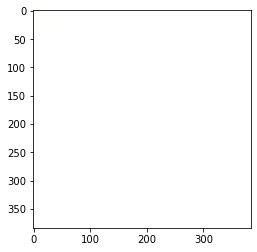

In [18]:
fname = "scene0171_00_800_5"
plt.imshow(imageio.imread("/data/unpaired_depth/Scannet_cleaned/trainB/depth/{}.png".format(fname)))
plt.imshow(imageio.imread("/data/unpaired_depth/Scannet_cleaned/trainB/img/{}.jpg".format(fname)))
# plt.imshow(imageio.imread("/data/unpaired_depth/Scannet_cleaned/trainA/depth/{}.png".format(fname)))

In [12]:
[x for x in res if x is not None]

['scene0171_00_800_5',
 'scene0163_01_1000_12',
 'scene0163_01_1000_5',
 'scene0163_01_1750_6',
 'scene0257_00_800_11',
 'scene0163_01_300_0']

In [ ]:
plt.imshow()

In [9]:
dataset[0]["B_name"]

TypeError: isfinite(): argument 'input' (position 1) must be Tensor, not list

In [1]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
from math import exp

def gaussian(window_size, sigma):
    gauss = torch.Tensor([exp(-(x - window_size//2)**2/float(2*sigma**2)) for x in range(window_size)])
    return gauss/gauss.sum()

def create_window(window_size, channel):
    _1D_window = gaussian(window_size, 1.5).unsqueeze(1)
    _2D_window = _1D_window.mm(_1D_window.t()).float().unsqueeze(0).unsqueeze(0)
    window = Variable(_2D_window.expand(channel, 1, window_size, window_size).contiguous())
    return window

def _ssim(img1, img2, window, window_size, channel, size_average = True):
    mu1 = F.conv2d(img1, window, padding = window_size//2, groups = channel)
    mu2 = F.conv2d(img2, window, padding = window_size//2, groups = channel)

    mu1_sq = mu1.pow(2)
    mu2_sq = mu2.pow(2)
    mu1_mu2 = mu1*mu2

    sigma1_sq = F.conv2d(img1*img1, window, padding = window_size//2, groups = channel) - mu1_sq
    sigma2_sq = F.conv2d(img2*img2, window, padding = window_size//2, groups = channel) - mu2_sq
    sigma12 = F.conv2d(img1*img2, window, padding = window_size//2, groups = channel) - mu1_mu2

    C1 = 0.01**2
    C2 = 0.03**2

    ssim_map = ((2*mu1_mu2 + C1)*(2*sigma12 + C2))/((mu1_sq + mu2_sq + C1)*(sigma1_sq + sigma2_sq + C2))

    if size_average:
        return ssim_map.mean()
    else:
        return ssim_map.mean(1).mean(1).mean(1)

class SSIM(torch.nn.Module):
    def __init__(self, window_size = 11, size_average = True):
        super(SSIM, self).__init__()
        self.window_size = window_size
        self.size_average = size_average
        self.channel = 1
        self.window = create_window(window_size, self.channel)

    def forward(self, img1, img2):
        (_, channel, _, _) = img1.size()

        if channel == self.channel and self.window.data.type() == img1.data.type():
            window = self.window
        else:
            window = create_window(self.window_size, channel)
            
            if img1.is_cuda:
                window = window.cuda(img1.get_device())
            window = window.type_as(img1)
            
            self.window = window
            self.channel = channel


        return _ssim(img1, img2, window, self.window_size, channel, self.size_average)

def ssim(img1, img2, window_size = 11, size_average = True):
    (_, channel, _, _) = img1.size()
    window = create_window(window_size, channel)
    
    if img1.is_cuda:
        window = window.cuda(img1.get_device())
    window = window.type_as(img1)
    
    return _ssim(img1, img2, window, window_size, channel, size_average)

In [30]:
os.listdir("/data/unpaired_depth/Scannet_data/depths_val/")

['scene0505_00_250.png',
 'scene0385_02_4100.png',
 'scene0232_02_450.png',
 'scene0332_00_1150.png',
 'scene0613_00_5600.png',
 'scene0451_01_700.png',
 'scene0404_01_1000.png',
 'scene0372_00_1850.png',
 'scene0143_01_1000.png',
 'scene0613_00_4150.png',
 'scene0041_01_800.png',
 'scene0012_00_0.png',
 'scene0140_00_2850.png',
 'scene0000_02_3350.png',
 'scene0505_00_1200.png',
 'scene0418_01_1450.png',
 'scene0553_02_1550.png',
 'scene0404_01_1150.png',
 'scene0012_00_4100.png',
 'scene0041_01_1700.png',
 'scene0040_00_750.png',
 'scene0000_02_250.png',
 'scene0553_02_600.png',
 'scene0501_00_1000.png',
 'scene0211_03_1450.png',
 'scene0012_00_4350.png',
 'scene0233_00_300.png',
 'scene0505_00_2750.png',
 'scene0501_01_2250.png',
 'scene0169_00_800.png',
 'scene0192_00_600.png',
 'scene0556_00_0.png',
 'scene0137_01_100.png',
 'scene0194_00_100.png',
 'scene0000_02_400.png',
 'scene0606_01_1500.png',
 'scene0505_00_1000.png',
 'scene0505_00_200.png',
 'scene0501_01_50.png',
 'scene0

In [4]:
fnames_val = ["scene0505_00_1200.png", "scene0404_01_850.png", "scene0140_00_3150.png", "scene0335_00_1050.png", "scene0040_00_1000.png"]

In [42]:
import shutil

In [58]:
os.makedirs("/data/unpaired_depth/Scannet_cleaned/valA/img")
os.makedirs("/data/unpaired_depth/Scannet_cleaned/valA/depth")
os.makedirs("/data/unpaired_depth/Scannet_cleaned/valB/img")
os.makedirs("/data/unpaired_depth/Scannet_cleaned/valB/depth")

In [59]:
for fname in fnames_val:
    src_path = "/data/unpaired_depth/Scannet_data/depths_val/{}".format(fname)
    tgt_path = "/data/unpaired_depth/Scannet_cleaned/valA/depth/{}".format(fname)
    shutil.copy(src_path, tgt_path)
    src_path = "/data/unpaired_depth/Scannet_data/images_val/{}.jpg".format(os.path.splitext(fname)[0])
    tgt_path = "/data/unpaired_depth/Scannet_cleaned/valA/img/{}.jpg".format(os.path.splitext(fname)[0])
    shutil.copy(src_path, tgt_path)
    
    src_path = "/data/unpaired_depth/Scannet_data/depths_val_gt/{}".format(fname)
    depth = imageio.imread(src_path)
    tgt_path = "/data/unpaired_depth/Scannet_cleaned/valB/depth/{}".format(fname)
    imageio.imsave(tgt_path, depth[1::2, 1::2])
    src_path = "/data/unpaired_depth/Scannet_data/images_val/{}.jpg".format(os.path.splitext(fname)[0])
    tgt_path = "/data/unpaired_depth/Scannet_cleaned/valB/img/{}.jpg".format(os.path.splitext(fname)[0])
    shutil.copy(src_path, tgt_path)

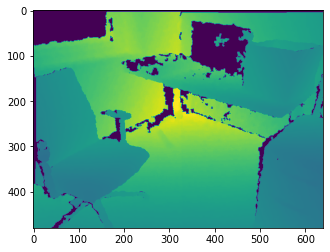

In [34]:
plt.imshow(imageio.imread("/data/unpaired_depth/Scannet_data/depths_val/scene0505_00_1200.png"))

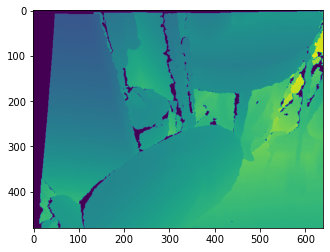

In [35]:
plt.imshow(imageio.imread("/data/unpaired_depth/Scannet_data/depths_val/scene0404_01_850.png"))

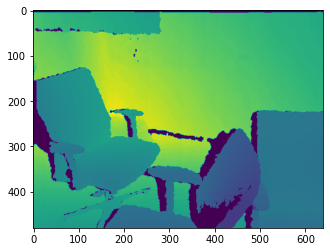

In [36]:
plt.imshow(imageio.imread("/data/unpaired_depth/Scannet_data/depths_val/scene0140_00_3150.png"))

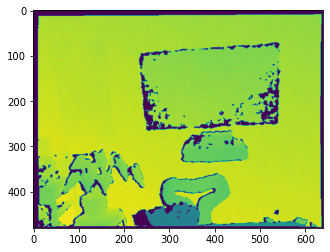

In [37]:
plt.imshow(imageio.imread("/data/unpaired_depth/Scannet_data/depths_val/scene0335_00_1050.png"))

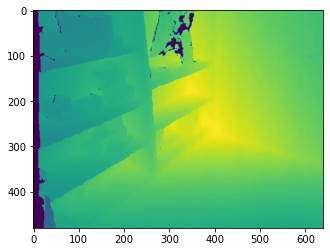

In [38]:
plt.imshow(imageio.imread("/data/unpaired_depth/Scannet_data/depths_val/scene0040_00_1000.png"))

In [119]:
scenes=[x.split("_")[0] for x in os.listdir("/data/unpaired_depth/Scannet_cleaned/images_train/")]

In [127]:
counts = dict()
for i in scenes:
    counts[i] = counts.get(i, 0) + 1

In [136]:
s = list(map(lambda x: x[0], sorted(counts.items(), key=lambda x: x[1])))

In [137]:
A_split = s[1::2]
B_split = s[::2]

In [138]:
A_scenes = [x for x in os.listdir("/data/unpaired_depth/Scannet_cleaned/images_train/") if x.split("_")[0] in A_split]
B_scenes = [x for x in os.listdir("/data/unpaired_depth/Scannet_cleaned/images_train/") if x.split("_")[0] in B_split]

In [142]:
os.makedirs("/data/unpaired_depth/Scannet_cleaned/trainA/depth/")
os.makedirs("/data/unpaired_depth/Scannet_cleaned/trainA/img/")
os.makedirs("/data/unpaired_depth/Scannet_cleaned/trainB/depth/")
os.makedirs("/data/unpaired_depth/Scannet_cleaned/trainB/img/")

In [143]:
for fname in A_scenes:
    fname, ext = os.path.splitext(fname)
    src_path = "/data/unpaired_depth/Scannet_cleaned/depths_train/{}.png".format(fname)
    tgt_path = "/data/unpaired_depth/Scannet_cleaned/trainA/depth/{}.png".format(fname)
    shutil.copy(src_path, tgt_path)
    src_path = "/data/unpaired_depth/Scannet_cleaned/images_train/{}.jpg".format(fname)
    tgt_path = "/data/unpaired_depth/Scannet_cleaned/trainA/img/{}.jpg".format(fname)
    shutil.copy(src_path, tgt_path)
    
for fname in B_scenes:
    fname, ext = os.path.splitext(fname)
    src_path = "/data/unpaired_depth/Scannet_cleaned/depths_train_gt/{}.png".format(fname)
    tgt_path = "/data/unpaired_depth/Scannet_cleaned/trainB/depth/{}.png".format(fname)
    shutil.copy(src_path, tgt_path)
    src_path = "/data/unpaired_depth/Scannet_cleaned/images_train/{}.jpg".format(fname)
    tgt_path = "/data/unpaired_depth/Scannet_cleaned/trainB/img/{}.jpg".format(fname)
    shutil.copy(src_path, tgt_path)

In [146]:
os.makedirs("/data/unpaired_depth/Scannet_cleaned/trainB/depth/")

In [147]:
for fname in B_scenes:
    fname, ext = os.path.splitext(fname)
    src_path = "/data/unpaired_depth/Scannet_cleaned/depths_train_gt/{}.png".format(fname)
    tgt_path = "/data/unpaired_depth/Scannet_cleaned/trainB/depth/{}.png".format(fname)
    shutil.copy(src_path, tgt_path)
    src_path = "/data/unpaired_depth/Scannet_cleaned/images_train/{}.jpg".format(fname)
    tgt_path = "/data/unpaired_depth/Scannet_cleaned/trainB/img/{}.jpg".format(fname)
    shutil.copy(src_path, tgt_path)

In [8]:
import os
import numpy as np
import torch
from multiprocessing import Pool
import imageio
A_scenes = [x for x in os.listdir("/data/unpaired_depth/Scannet_cleaned/trainA/depth/")]
B_scenes = [x for x in os.listdir("/data/unpaired_depth/Scannet_cleaned/trainB/depth/")]

In [9]:
def check_B(fname):
    fname, ext = os.path.splitext(fname)
    depth_path = "/data/unpaired_depth/Scannet_cleaned/trainB/depth/{}.png".format(fname)
    depth = torch.from_numpy(imageio.imread(depth_path).astype(np.float32))
    depth = depth[32:160, 32:160]
    if torch.unique(depth).shape[0] < 2:
        return fname
    
    img_path = "/data/unpaired_depth/Scannet_cleaned/trainB/img/{}.jpg".format(fname)
    img = torch.from_numpy(imageio.imread(img_path))
    img = img[128:256,128:256]
    if torch.unique(img).shape[0] < 2:
        return fname

In [10]:
def check_A(fname):
    fname, ext = os.path.splitext(fname)
    depth_path = "/data/unpaired_depth/Scannet_cleaned/trainA/depth/{}.png".format(fname)
    depth = torch.from_numpy(imageio.imread(depth_path).astype(np.float32))
    depth = depth[32:160, 32:160]
    if torch.unique(depth).shape[0] < 2:
        return fname
    
    img_path = "/data/unpaired_depth/Scannet_cleaned/trainA/img/{}.jpg".format(fname)
    img = torch.from_numpy(imageio.imread(img_path))
    img = img[128:256,128:256]
    if torch.unique(img).shape[0] < 2:
        return fname

In [11]:
n_processes = 10

with Pool(n_processes) as p:   
    res = list(tqdm.notebook.tqdm(p.imap(func=check_B, iterable=B_scenes), total=len(B_scenes)))

In [12]:
bad_B = [x for x in res if x is not None]

In [13]:
n_processes = 20

with Pool(n_processes) as p:   
    res = list(tqdm.notebook.tqdm(p.imap(func=check_A, iterable=A_scenes), total=len(A_scenes)))

In [15]:
bad_A = [x for x in res if x is not None]

In [18]:
len(bad_A)

443

In [19]:
for fname in bad_A:
    depth_path = "/data/unpaired_depth/Scannet_cleaned/trainA/depth/{}.png".format(fname)
    os.remove(depth_path)
    img_path = "/data/unpaired_depth/Scannet_cleaned/trainA/img/{}.jpg".format(fname)
    os.remove(img_path)

In [20]:
for fname in bad_B:
    depth_path = "/data/unpaired_depth/Scannet_cleaned/trainB/depth/{}.png".format(fname)
    os.remove(depth_path)
    img_path = "/data/unpaired_depth/Scannet_cleaned/trainB/img/{}.jpg".format(fname)
    os.remove(img_path)

In [107]:
!ls -la ./checkpoints/scannet_paired/

total 682256
drwxr-xr-x 2 safin safin      4096 Dec  6 23:21 .
drwxrwxr-x 7 safin safin      4096 Nov 30 17:17 ..
-rw-r--r-- 1 safin safin 349300319 Dec  5 16:31 10.pt
-rw-r--r-- 1 safin safin 349300318 Dec  6 23:21 20.pt
-rw-r--r-- 1 safin safin      5579 Dec  3 20:48 train_opt.txt


In [112]:
!python test.py --name scannet_paired\
--dataroot /data/unpaired_depth/Scannet_cleaned \
--gpu_ids 1\
--inp_B depth\
--use_cycle_A\
--use_cycle_B\
--batch_size 1\
--phase val\
--load_epoch 30\
--img_dir scannet_paired_out

Dataset SemiCycleDataset was created
The number of training images = 5
initialize network with xavier
initialize network with xavier
model [SemiCycleGANModel] was created
loading the model from ./checkpoints/scannet_paired/30.pt
loading the model from ./checkpoints/scannet_paired/30.pt
---------- Networks initialized -------------
[Network netG_A] Total number of parameters : 11.620 M
[Network netG_B] Total number of parameters : 11.944 M
-----------------------------------------------
100%|█████████████████████████████████████████████| 5/5 [00:19<00:00,  3.93s/it]


In [1]:
!python test.py --name scannet_unflow_bigL_w_idtA\
--dataroot /data/unpaired_depth/Scannet_cleaned \
--gpu_ids 2\
--use_cycle_B\
--inp_B img_depth\
--use_spnorm\
--batch_size 1\
--phase val\
--load_epoch 60\
--crop_size_h 128\
--crop_size_w 128\
--load_size_h 192\
--load_size_w 192\
--img_dir unflow_bigL_w_idtA

Traceback (most recent call last):
  File "test.py", line 14, in <module>
    dataset = create_dataset(opt)
  File "/workspace/code/my_cyclegan/dataloader/__init__.py", line 39, in create_dataset
    dataset = Dataset_Dataloader(opt)
  File "/workspace/code/my_cyclegan/dataloader/__init__.py", line 47, in __init__
    self.dataset = dataset_class(opt)
  File "/workspace/code/my_cyclegan/dataloader/semi_cycle.py", line 32, in __init__
    self.A_imgs = self.get_paths(self.dir_A_img)
  File "/workspace/code/my_cyclegan/dataloader/base_dataset.py", line 29, in get_paths
    assert os.path.isdir(dir), '{} is not a valid directory'.format(dir)
AssertionError: /data/unpaired_depth/Scannet_cleaned/valA/full_size/img is not a valid directory


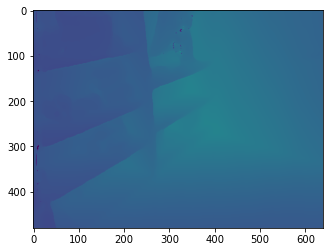

In [68]:
plt.imshow(imageio.imread("scannet_paired_out/scannet_paired/val/A/scene0040_00_1000"))

In [15]:
import os
import numpy as np
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

def render(fname):
    fname, ext = os.path.splitext(fname)
    img = imageio.imread("./unflow_bigL_w_idtA/scannet_unflow_bigL_w_idtA/val/A/%s_img.png" % fname)
    depth = imageio.imread("./unflow_bigL_w_idtA/scannet_unflow_bigL_w_idtA/val/A/%s_depth.png" % fname)
    depth_fake = imageio.imread("./unflow_bigL_w_idtA/scannet_unflow_bigL_w_idtA/val/A/%s_depth_fake.png" % fname)
    depth_gt = imageio.imread("./unflow_bigL_w_idtA/scannet_unflow_bigL_w_idtA/val/B/%s_depth.png" % fname)
    
    depth = depth.astype(np.float64)
    depth_fake = depth_fake.astype(np.float64)
    depth_gt = depth_gt.astype(np.float64)
    l1_metric = (np.abs(depth_fake-depth_gt)*(depth_gt>10)).mean()
    print(l1_metric)
    fig, axes = plt.subplots(1, 4, figsize=(15, 23))

    max_depth = max(depth_fake.max(), depth_gt.max(), depth.max())
    depth_fake /= max_depth
    depth /= max_depth
    depth_gt /= max_depth

    for i, x in enumerate([img, depth, depth_fake, depth_gt]):
        axes[i].imshow(x, vmin=0, vmax=1, cmap="jet")
        axes[i].tick_params(axis=u'both', which=u'both',length=0)
        axes[i].set_xticklabels([])
        axes[i].set_yticklabels([])
    plt.tight_layout()
    plt.show()

In [16]:
fnames_val = ["scene0505_00_1200.png", "scene0404_01_850.png", "scene0140_00_3150.png", "scene0335_00_1050.png", "scene0040_00_1000.png"]

306.26161024305554


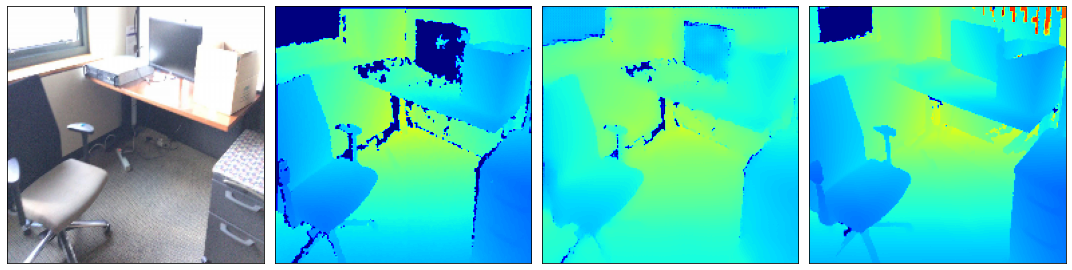

461.02973090277777


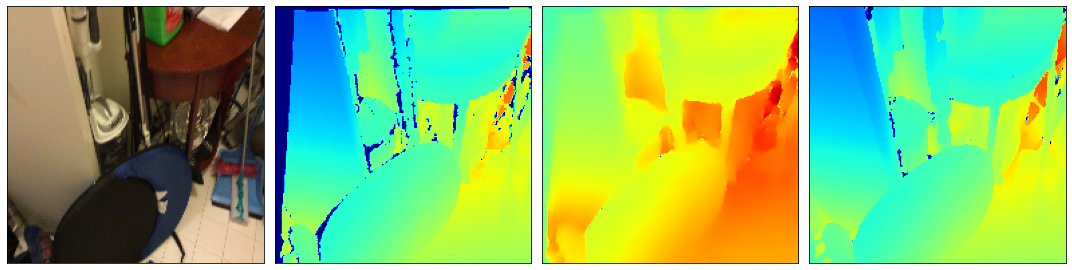

235.01285807291666


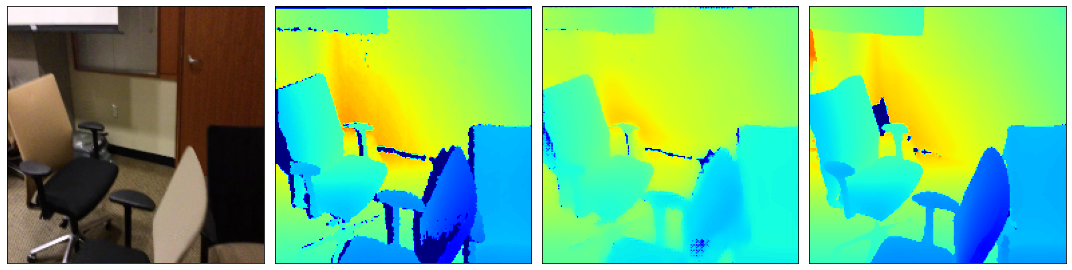

138.19957139756946


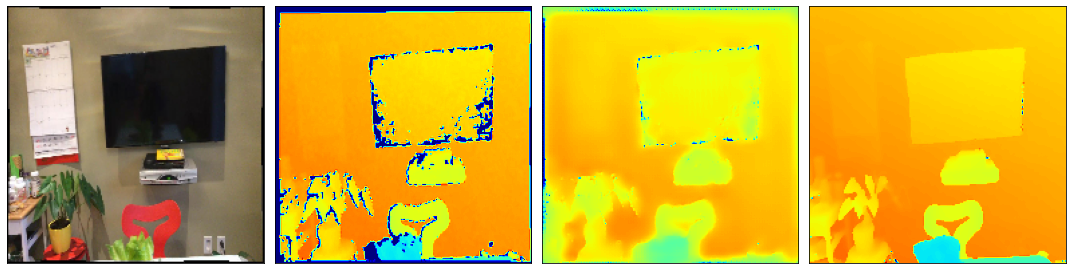

351.3357747395833


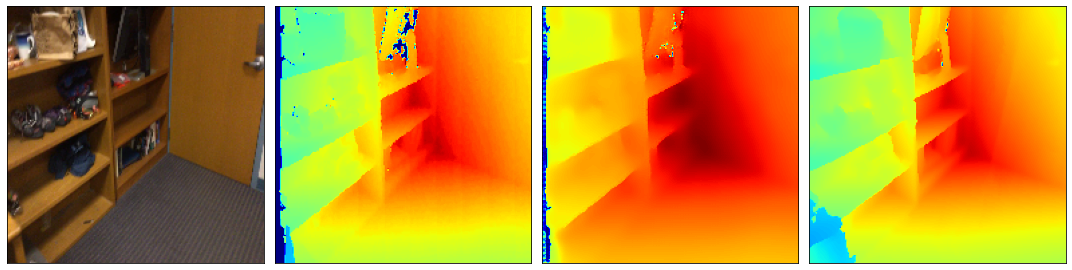

TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'

In [17]:
np.asarray(list(map(render, fnames_val))).mean()

In [113]:
def render(fname):
    fname, ext = os.path.splitext(fname)
    img = imageio.imread("./scannet_paired_out/scannet_paired/val/A/%s_img.png" % fname)
    depth = imageio.imread("./scannet_paired_out/scannet_paired/val/A/%s_depth.png" % fname)
    depth_fake = imageio.imread("./scannet_paired_out/scannet_paired/val/A/%s_depth_fake.png" % fname)
    depth_gt = imageio.imread("./scannet_paired_out/scannet_paired/val/B/%s_depth.png" % fname)
    
    depth = depth.astype(np.float64)
    depth_fake = depth_fake.astype(np.float64)
    depth_gt = depth_gt.astype(np.float64)
    l1_metric = np.abs(depth_fake-depth_gt).mean()
    fig, axes = plt.subplots(1, 4, figsize=(15, 23))

    max_depth = max(depth_fake.max(), depth_gt.max(), depth.max())
    depth_fake /= max_depth
    depth /= max_depth
    depth_gt /= max_depth

    for i, x in enumerate([img, depth, depth_fake, depth_gt]):
        axes[i].imshow(x, vmin=0, vmax=1, cmap="jet")
        axes[i].tick_params(axis=u'both', which=u'both',length=0)
        axes[i].set_xticklabels([])
        axes[i].set_yticklabels([])
    plt.tight_layout()
    plt.show()
    
    return l1_metric

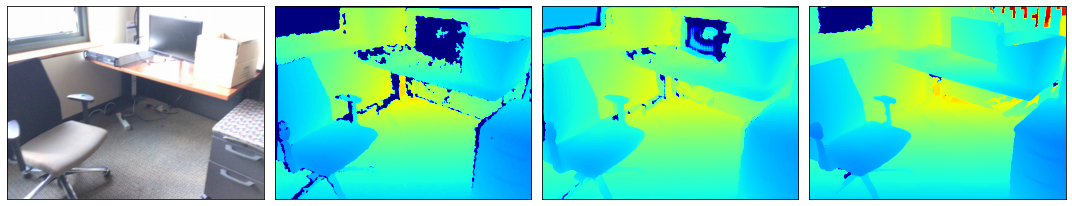

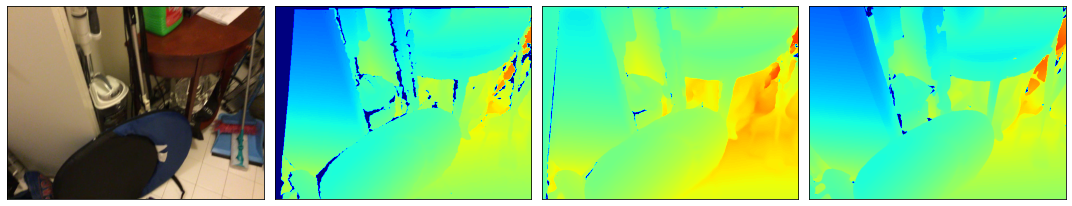

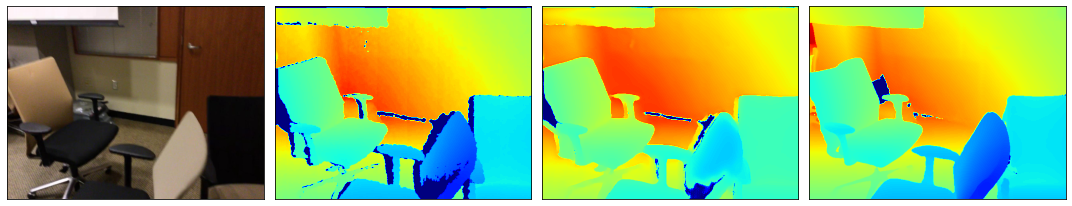

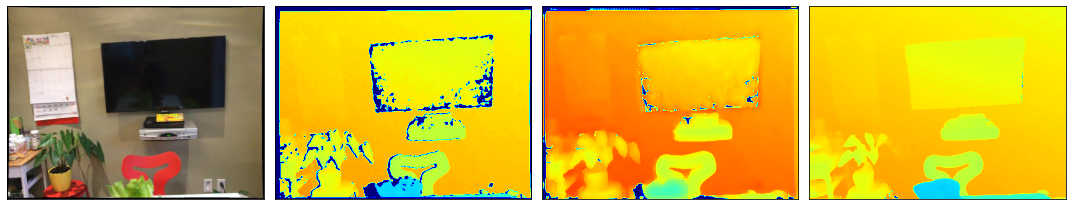

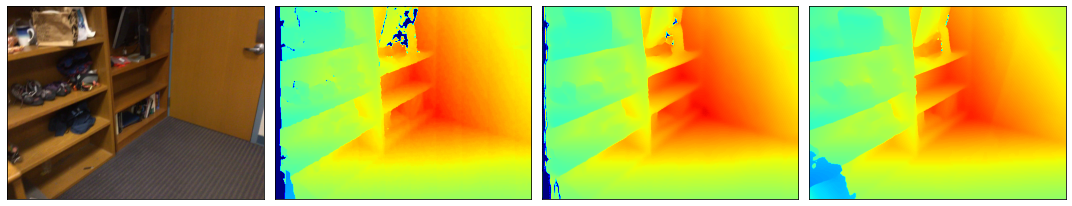

221.42442057291663

In [114]:
np.asarray(list(map(render, fnames_val))).mean()

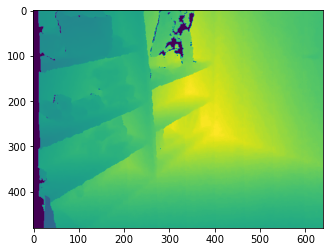

In [69]:
plt.imshow(imageio.imread("scannet_paired_out/scannet_paired/val/A/scene0040_00_1000_depth.png"))

In [65]:
!ls -la checkpoints/scannet_paired/

total 682256
drwxr-xr-x 2 safin safin      4096 Dec  6 23:21 .
drwxrwxr-x 7 safin safin      4096 Nov 30 17:17 ..
-rw-r--r-- 1 safin safin 349300319 Dec  5 16:31 10.pt
-rw-r--r-- 1 safin safin 349300318 Dec  6 23:21 20.pt
-rw-r--r-- 1 safin safin      5579 Dec  3 20:48 train_opt.txt


In [2]:
#https://github.com/mubeta06/python/blob/master/signal_processing/sp/ssim.py

In [3]:
import imageio
import numpy as np
import sys
import numpy
from scipy import signal
from scipy import ndimage

def fspecial_gauss(size, sigma):
    """Function to mimic the 'fspecial' gaussian MATLAB function
    """
    x, y = numpy.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
    g = numpy.exp(-((x**2 + y**2)/(2.0*sigma**2)))
    return g/g.sum()

def ssim(img1, img2, cs_map=False):
    """Return the Structural Similarity Map corresponding to input images img1 
    and img2 (images are assumed to be uint8)
    
    This function attempts to mimic precisely the functionality of ssim.m a 
    MATLAB provided by the author's of SSIM
    https://ece.uwaterloo.ca/~z70wang/research/ssim/ssim_index.m
    """
    img1 = img1.astype(numpy.float64)
    img2 = img2.astype(numpy.float64)
    size = 11
    sigma = 1.5
    window = fspecial_gauss(size, sigma)
    K1 = 0.01
    K2 = 0.03
    L = 255 #bitdepth of image
    C1 = (K1*L)**2
    C2 = (K2*L)**2
    mu1 = signal.fftconvolve(window, img1, mode='valid')
    mu2 = signal.fftconvolve(window, img2, mode='valid')
    mu1_sq = mu1*mu1
    mu2_sq = mu2*mu2
    mu1_mu2 = mu1*mu2
    sigma1_sq = signal.fftconvolve(window, img1*img1, mode='valid') - mu1_sq
    sigma2_sq = signal.fftconvolve(window, img2*img2, mode='valid') - mu2_sq
    sigma12 = signal.fftconvolve(window, img1*img2, mode='valid') - mu1_mu2
    if cs_map:
        return (((2*mu1_mu2 + C1)*(2*sigma12 + C2))/((mu1_sq + mu2_sq + C1)*
                    (sigma1_sq + sigma2_sq + C2)), 
                (2.0*sigma12 + C2)/(sigma1_sq + sigma2_sq + C2))
    else:
        return ((2*mu1_mu2 + C1)*(2*sigma12 + C2))/((mu1_sq + mu2_sq + C1)*
                    (sigma1_sq + sigma2_sq + C2))

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
t=os.listdir("/data/unpaired_depth/Scannet_cleaned/images_train/")

In [26]:
idx = 20
fname_base, ext = os.path.splitext(t[idx])
img = imageio.imread("/data/unpaired_depth/Scannet_cleaned/images_train/{}{}".format(fname_base, ".jpg"))
depth_lq = imageio.imread("/data/unpaired_depth/Scannet_cleaned/depths_train/{}{}".format(fname_base, ".png"))
depth_gt = imageio.imread("/data/unpaired_depth/Scannet_cleaned/depths_train_gt/{}{}".format(fname_base, ".png"))

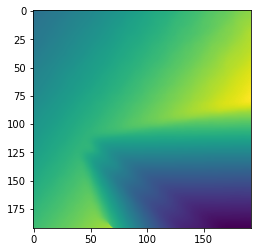

In [27]:
plt.imshow(depth_gt)

In [29]:
len(os.listdir("/data/unpaired_depth/Scannet_cleaned/images_train/"))

138645

In [ ]:
os.listdir()

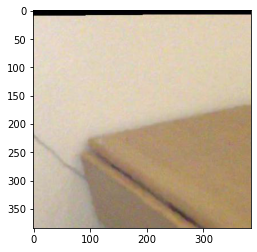

In [28]:
plt.imshow(img)

In [42]:
import glob
import tqdm
import os
from multiprocessing import Pool

fnames = os.listdir("/data/unpaired_depth/Scannet_data/depths_train/")


def calc_ssim(fname):
    img = imageio.imread("/data/unpaired_depth/Scannet_data/depths_train/{}".format(fname))
    img_gt = imageio.imread("/data/unpaired_depth/Scannet_data/depths_train_gt/{}".format(fname))
    img_gt = img_gt[1::2,1::2]
    return ssim(img, img_gt).mean()

n_processes = 40

with Pool(n_processes) as p:   
    res = list(tqdm.notebook.tqdm(p.imap(func=calc_ssim, iterable=fnames), total=len(fnames)))

In [59]:
res

array([0.64119523, 0.67492004, 0.61590302, ..., 0.82880742, 0.81057194,
       0.64379205])

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
sorted(fnames)[-10:]

['scene0706_00_300.png',
 'scene0706_00_350.png',
 'scene0706_00_500.png',
 'scene0706_00_550.png',
 'scene0706_00_600.png',
 'scene0706_00_700.png',
 'scene0706_00_750.png',
 'scene0706_00_800.png',
 'scene0706_00_850.png',
 'scene0706_00_900.png']

In [64]:
np.quantile(res, 0.70)

0.7160739333291779

In [33]:
fnames= fnames[:40]

In [46]:
res = np.asarray(res)

In [58]:
(res < np.quantile(res, 0.03)).sum()

1080

In [54]:
[fnames[i] for i in np.where(res < np.quantile(res, 0.03))[0].tolist()]

['scene0691_00_0.png',
 'scene0064_00_800.png',
 'scene0206_01_600.png',
 'scene0631_01_350.png',
 'scene0151_00_450.png',
 'scene0297_02_1050.png',
 'scene0696_01_1400.png',
 'scene0022_01_1250.png',
 'scene0011_00_1200.png',
 'scene0173_01_250.png',
 'scene0210_01_400.png',
 'scene0606_00_1750.png',
 'scene0301_00_1650.png',
 'scene0058_00_0.png',
 'scene0323_01_600.png',
 'scene0344_01_0.png',
 'scene0309_00_250.png',
 'scene0285_00_250.png',
 'scene0701_02_1050.png',
 'scene0655_01_650.png',
 'scene0419_02_1550.png',
 'scene0059_01_1250.png',
 'scene0024_00_1650.png',
 'scene0196_00_700.png',
 'scene0500_00_50.png',
 'scene0015_00_200.png',
 'scene0598_01_550.png',
 'scene0342_00_500.png',
 'scene0309_00_100.png',
 'scene0582_01_550.png',
 'scene0457_01_1000.png',
 'scene0704_01_100.png',
 'scene0263_01_0.png',
 'scene0706_00_100.png',
 'scene0041_00_250.png',
 'scene0001_01_700.png',
 'scene0059_02_500.png',
 'scene0304_00_1200.png',
 'scene0518_00_100.png',
 'scene0208_00_100.png

In [233]:
img = imageio.imread("/data/unpaired_depth/Scannet_data/depths_train/scene0000_00_1050.png")
img_gt = imageio.imread("/data/unpaired_depth/Scannet_data/depths_train_gt/scene0000_00_1050.png")
img_gt = img_gt[1::2,1::2]

In [214]:
fname = 'scene0691_00_0.png'
img = imageio.imread("/data/unpaired_depth/Scannet_data/depths_train/{}".format(fname))
img_gt = imageio.imread("/data/unpaired_depth/Scannet_data/depths_train_gt/{}".format(fname))
img_gt = img_gt[0::2,0::2]

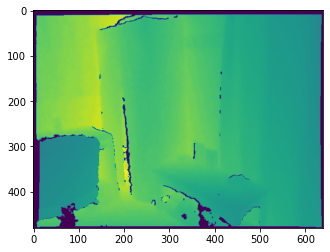

In [222]:
plt.imshow(img)

In [105]:
img.strides

(1280, 2)

In [ ]:
640*480


In [114]:
t = np.arange(49).reshape(7,7)

In [389]:
img = imageio.imread("/data/unpaired_depth/Scannet_data/images_train/scene0000_00_100.jpg")

In [371]:
img_strided = np.lib.stride_tricks.as_strided(img_gt, shape=(10,10,192,192), strides=(64*img_gt.strides[0], 64*img_gt.strides[1], img_gt.strides[0], img_gt.strides[1]))

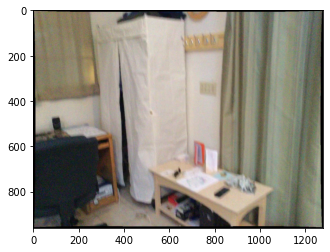

In [395]:
plt.imshow(img)

In [393]:
img.max()

254.89593750000003

In [394]:
img = 

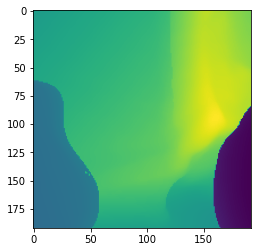

In [386]:
plt.imshow(img_strided[4,4])

In [344]:
img_strided = np.lib.stride_tricks.as_strided(img, shape=(5,8,192,192,3), strides=(64*img.strides[0], 64*img.strides[1], img.strides[0], img.strides[1], img.strides[2]))

In [323]:
img.strides

(3888, 3, 1)

In [ ]:
mg_strided = np.lib.stride_tricks.as_strided(img, shape=(5,8,192,192), strides=(64*img.strides[0], 64*img.strides[1], img.strides[0], img.strides[1]))

In [294]:
imageio.imsave()

<module 'imageio' from '/opt/conda/lib/python3.7/site-packages/imageio/__init__.py'>

In [260]:
img_gt_strided = np.lib.stride_tricks.as_strided(img_gt, shape=(5,8,192,192), strides=(64*img_gt.strides[0], 64*img_gt.strides[1], img_gt.strides[0], img_gt.strides[1]))
img_strided = np.lib.stride_tricks.as_strided(img, shape=(5,8,192,192), strides=(64*img.strides[0], 64*img.strides[1], img.strides[0], img.strides[1]))

In [363]:
!rm -rf /data/unpaired_depth/Scannet_cleaned/depths_train_gt
!rm -rf /data/unpaired_depth/Scannet_cleaned/depths_train
!rm -rf /data/unpaired_depth/Scannet_cleaned/images_train

!rm -rf /data/unpaired_depth/Scannet_cleaned/depths_test_gt
!rm -rf /data/unpaired_depth/Scannet_cleaned/depths_test
!rm -rf /data/unpaired_depth/Scannet_cleaned/images_test

In [335]:
os.makedirs("/data/unpaired_depth/Scannet_cleaned/depths_train_gt", exist_ok=True)
os.makedirs("/data/unpaired_depth/Scannet_cleaned/depths_train", exist_ok=True)
os.makedirs("/data/unpaired_depth/Scannet_cleaned/images_train", exist_ok=True)

In [300]:
import glob
import tqdm
import os
from multiprocessing import Pool

fnames = os.listdir("/data/unpaired_depth/Scannet_data/depths_train/")


def calc_ssim(fname):
    fname_base, ext = os.path.splitext(fname)
    img = imageio.imread("/data/unpaired_depth/Scannet_data/images_train/{}{}".format(fname_base, ".jpg"))
    depth_lq = imageio.imread("/data/unpaired_depth/Scannet_data/depths_train/{}".format(fname))
    depth_gt = imageio.imread("/data/unpaired_depth/Scannet_data/depths_train_gt/{}".format(fname))
    depth_gt = depth_gt[1::2,1::2]
    
    ssim_mtrx = ssim(depth_lq, depth_gt)
    ssim_mtrx_strided = np.lib.stride_tricks.as_strided(ssim_mtrx, shape=(5,8,192,192), strides=(64*ssim_mtrx.strides[0], 64*ssim_mtrx.strides[1], ssim_mtrx.strides[0], ssim_mtrx.strides[1]))
    depth_gt_strided = np.lib.stride_tricks.as_strided(depth_gt, shape=(5,8,192,192), strides=(64*depth_gt.strides[0], 64*depth_gt.strides[1], depth_gt.strides[0], depth_gt.strides[1]))
    depth_lq_strided = np.lib.stride_tricks.as_strided(depth_lq, shape=(5,8,192,192), strides=(64*depth_lq.strides[0], 64*depth_lq.strides[1], depth_lq.strides[0], depth_lq.strides[1]))
    img_strided = np.lib.stride_tricks.as_strided(img, shape=(5,8,192,192), strides=(64*img.strides[0], 64*img.strides[1], img.strides[0], img.strides[1]))

    ssim_idx = ssim_mtrx_strided.mean(axis=3).mean(axis=2) > 0.8
    n = ssim_idx.sum()

    if n > 0:
        depth_gt_good = depth_gt_strided[ssim_idx]
        depth_lq_good = depth_lq_strided[ssim_idx]
        img_good = img_strided[ssim_idx]
        final_idx = (depth_gt_good > 10).mean(axis=2).mean(axis=1) > 0.9
        n_good = final_idx.sum()
        if n_good == 0:
            return
        else:
            depth_gt_good = depth_gt_good[final_idx]
            depth_lq_good = depth_lq_good[final_idx]
            img_good = img_good[final_idx]

            for i in range(n_good):
                imageio.imsave("/data/unpaired_depth/Scannet_cleaned/images_train/{}_{}{}".format(fname_base, i, ".jpg"), img_good[i])
                imageio.imsave("/data/unpaired_depth/Scannet_cleaned/depths_train/{}_{}{}".format(fname_base, i, ext), depth_lq_good[i])
                imageio.imsave("/data/unpaired_depth/Scannet_cleaned/depths_train_gt/{}_{}{}".format(fname_base, i, ext), depth_gt_good[i])

n_processes = 40

with Pool(n_processes) as p:   
    res = list(tqdm.notebook.tqdm(p.imap(func=calc_ssim, iterable=fnames), total=len(fnames)))

Process ForkPoolWorker-200:
Process ForkPoolWorker-177:
Process ForkPoolWorker-197:
Process ForkPoolWorker-171:
Process ForkPoolWorker-191:
Process ForkPoolWorker-182:
Process ForkPoolWorker-164:
Process ForkPoolWorker-172:
Process ForkPoolWorker-199:
Process ForkPoolWorker-166:
Process ForkPoolWorker-180:
Process ForkPoolWorker-184:
Traceback (most recent call last):
Process ForkPoolWorker-165:
Process ForkPoolWorker-179:
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-168:
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Process ForkPoolWorker-161:
Process ForkPoolWorker-195:
Process ForkPoolWorker-189:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 99, in run
    se

KeyboardInterrupt: 

In [5]:
np.unique(np.arange(16))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [6]:
import glob
import tqdm
import os
from multiprocessing import Pool
import numpy as np

fnames = os.listdir("/data/unpaired_depth/Scannet_cleaned/depths_train/")


def check(fname):
    fname_base, ext = os.path.splitext(fname)
    img = imageio.imread("/data/unpaired_depth/Scannet_cleaned/images_train/{}{}".format(fname_base, ".jpg"))
    depth_lq = imageio.imread("/data/unpaired_depth/Scannet_cleaned/depths_train/{}".format(fname))
    depth_gt = imageio.imread("/data/unpaired_depth/Scannet_cleaned/depths_train_gt/{}".format(fname))
    
    if np.unique(img).shape[0] < 2 or np.unique(depth_lq).shape[0] < 2 or np.unique(depth_gt).shape[0] < 2 :
        return fname_base

n_processes = 40

with Pool(n_processes) as p:   
    res = list(tqdm.notebook.tqdm(p.imap(func=check, iterable=fnames), total=len(fnames)))

In [10]:
len([r for r in res if r is not None])

142

In [286]:
ssim_mtrx = ssim(depth_lq, depth_gt)
ssim_mtrx_strided = np.lib.stride_tricks.as_strided(ssim_mtrx, shape=(5,8,192,192), strides=(64*ssim_mtrx.strides[0], 64*ssim_mtrx.strides[1], ssim_mtrx.strides[0], ssim_mtrx.strides[1]))
depth_gt_strided = np.lib.stride_tricks.as_strided(depth_gt, shape=(5,8,192,192), strides=(64*depth_gt.strides[0], 64*depth_gt.strides[1], depth_gt.strides[0], depth_gt.strides[1]))
depth_lq_strided = np.lib.stride_tricks.as_strided(depth_lq, shape=(5,8,192,192), strides=(64*depth_lq.strides[0], 64*depth_lq.strides[1], depth_lq.strides[0], depth_lq.strides[1]))
img_strided = np.lib.stride_tricks.as_strided(img, shape=(5,8,192,192), strides=(64*img.strides[0], 64*img.strides[1], img.strides[0], img.strides[1]))

ssim_idx = ssim_mtrx_strided.mean(axis=3).mean(axis=2) > 0.8
n = ssim_idx.sum()

if n > 0:
    depth_gt_good = depth_gt_strided[ssim_idx]
    depth_lq_good = depth_lq_strided[ssim_idx]
    img_good = img_strided[ssim_idx]
    final_idx = (depth_gt_good > 10).mean(axis=2).mean(axis=1) > 0.9
    n_good = final_idx.sum()
    if n_good == 0:
        return
    else:
        depth_gt_good = depth_gt_good[final_idx]
        depth_lq_good = depth_lq_good[final_idx]
        img_good = img_good[final_idx]
        
        for i in range(n_good)

0

In [287]:
img_gt_good = img_gt_strided[ssim_mtrx_strided.mean(axis=3).mean(axis=2) > 0.7]
img_good = img_strided[ssim_mtrx_strided.mean(axis=3).mean(axis=2) > 0.7]

In [291]:
img_gt_good[0]

array([[1769, 1770, 1771, ..., 1943, 1945, 1947],
       [1770, 1771, 1772, ..., 1944, 1946, 1947],
       [1771, 1772, 1773, ..., 1945, 1946, 1948],
       ...,
       [1913, 1913, 1914, ..., 2109, 2110, 2111],
       [1914, 1914, 1915, ..., 2110, 2111, 2112],
       [1915, 1915, 1916, ..., 2111, 2112, 2113]], dtype=uint16)

In [293]:
(img_gt_good > 10).mean(axis=2).mean(axis=1) > 0.9

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

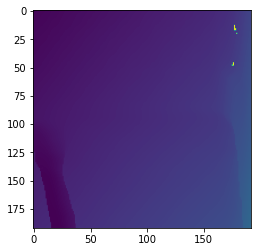

In [262]:
plt.imshow(img_gt_good[4])

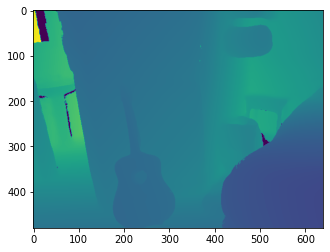

In [264]:
plt.imshow(img_gt)

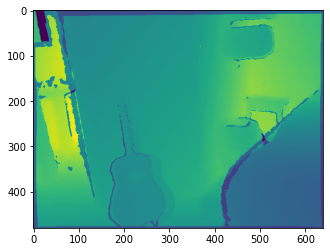

In [279]:
plt.imshow(0.5*img + 0.5*img_gt)

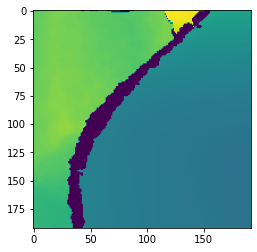

In [271]:
plt.imshow(img_good[7])

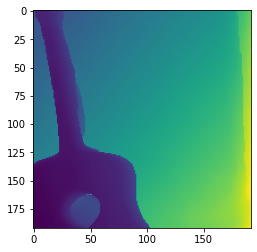

In [276]:
plt.imshow(img_gt[192:192+192, 192:192+192])

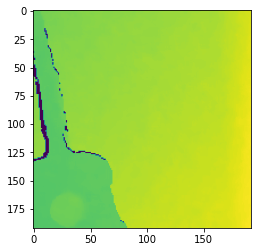

In [277]:
plt.imshow(img[192:192+192, 192:192+192])

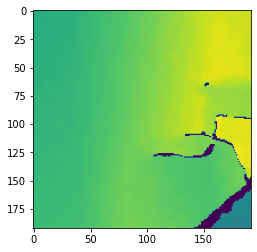

In [273]:
plt.imshow(img_strided[2,5])

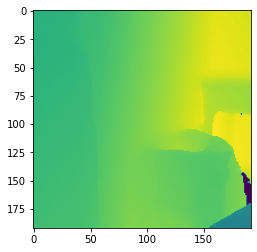

In [274]:
plt.imshow(img_gt_strided[2,5])

In [147]:
img_strided[0,0]

array([[   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ..., 3037, 3038, 3039],
       [   0,    0,    0, ..., 3037, 3038, 3039],
       [   0,    0,    0, ..., 3038, 3038, 3039]], dtype=uint16)

In [148]:
img_gt[:192,:192]

Array([[   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ..., 3037, 3038, 3039],
       [   0,    0,    0, ..., 3037, 3038, 3039],
       [   0,    0,    0, ..., 3038, 3038, 3039]], dtype=uint16)

In [84]:
img_strided[0]

10

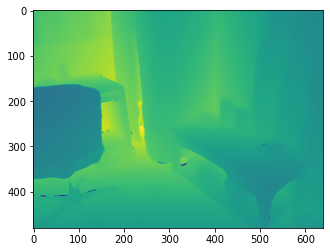

In [204]:
plt.imshow(img_gt)

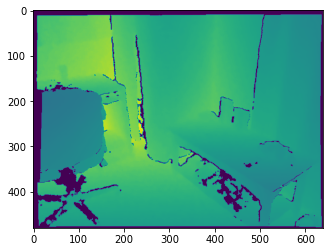

In [205]:
plt.imshow(img)